<a href="https://colab.research.google.com/github/AneezaHafeez/Brain-Tumor-Dec-tection-usin-CNN-VGG-16/blob/main/Brain_Tumor_Detection_Using_CNN_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 115s 13s/step - accuracy: 0.5002 - loss: 1.2403 - val_accuracy: 0.4857 - val_loss: 1.2229
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 156s 15s/step - accuracy: 0.5428 - loss: 1.1243 - val_accuracy: 0.6571 - val_loss: 0.6976
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 122s 12s/step - accuracy: 0.6428 - loss: 0.6366 - val_accuracy: 0.6857 - val_loss: 0.5905
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 161s 14s/step - accuracy: 0.6698 - loss: 0.5482 - val_accuracy: 0.7143 - val_loss: 0.5697
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 129s 13s/step - accuracy: 0.7741 - loss: 0.5450 - val_accuracy: 0.7143 - val_loss: 0.6057
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 155s 15s/step - accuracy: 0.7788 - loss: 0.5111 - val_accuracy: 0.7143 - val_loss: 0.5408
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 109s 12s/step - accuracy: 0.7599 - loss: 0.5008 - val_accuracy: 0.7714 - val_loss: 0.5446
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 160s 

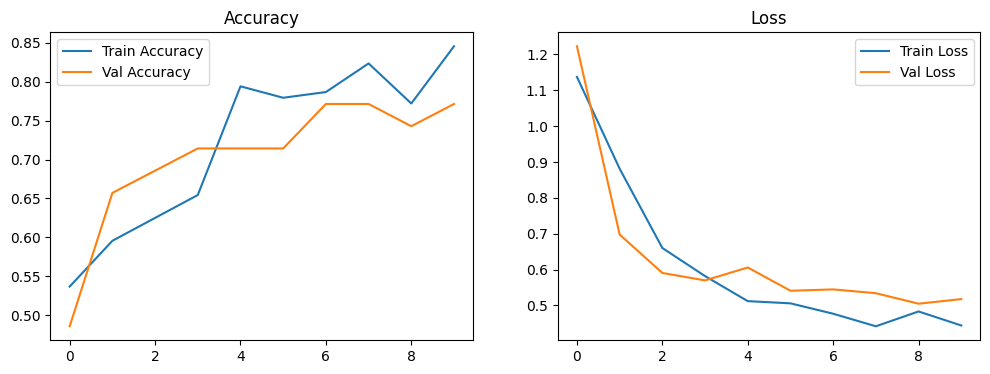

2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7452 - loss: 0.4988


Validation Loss: 0.5047194957733154
Validation Accuracy: 74.29%


In [ ]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, normalize
from google.colab import drive

# Step 1: Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Step 2: Set dataset paths (update the path to match your Google Drive dataset folder)
image_directory = '/content/drive/MyDrive/brain_tumor_dataset/'  # Update this path

# Check if the directory exists
if not os.path.exists(image_directory):
    raise FileNotFoundError(f"Dataset not found at {image_directory}")

# Step 3: Load and prepare the dataset (this part replaces ImageDataGenerator with manual train-test split)
no_tumor_images = os.listdir(image_directory + 'no/')
yes_tumor_images = os.listdir(image_directory + 'yes/')

dataset = []
label = []
INPUT_SIZE = 224  # VGG-16 input size is 224x224

# Load 'no' tumor images
for image_name in no_tumor_images:
    if image_name.endswith('.jpg'):
        image = cv2.imread(image_directory + 'no/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)  # Label for 'no tumor'

# Load 'yes' tumor images
for image_name in yes_tumor_images:
    if image_name.endswith('.jpg'):
        image = cv2.imread(image_directory + 'yes/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)  # Label for 'tumor'

dataset = np.array(dataset)
label = np.array(label)

# Step 4: Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

# Normalize the data
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Step 5: Load the VGG16 model, excluding top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(INPUT_SIZE, INPUT_SIZE, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Step 6: Add custom layers on top of VGG16
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Softmax for two-class classification

# Step 7: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',  # Two-class softmax classification
              metrics=['accuracy'])

# Step 8: Set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 9: Train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=16,
                    callbacks=[early_stopping])

# Step 10: Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Step 11: Evaluate the model on the test set
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Step 12: Save the model
model.save('brain_tumor_vgg16_with_split.h5')


In [3]:
!echo "# Brain-Tumor-Dec-tection-usin-CNN-VGG-16" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/AneezaHafeez/Brain-Tumor-Dec-tection-usin-CNN-VGG-16.git
!git push -u origin main
!echo "# Brain-Tumor-Dec-tection-usin-CNN-VGG-16" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/AneezaHafeez/Brain-Tumor-Dec-tection-usin-CNN-VGG-16.git
!git push -u origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@e1d5decccd9e.(none)')
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/AneezaHafeez/Brain-Tumor-Dec-te